# Модель оптимизации положения бинов

## Постановка задачи

Выбрать расположение бинов в 2D и 3D сейсмике с наиболее равномерным распределением трасс.

## Датасет

SPS файлы по 2D сейсмике валыйнтойского участка.

Загрузка SPS файлов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from field_index import FieldIndex
from seismic_batch import SeismicBatch
from utils import get_file_by_index

dfr = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_R_utm.txt', sep='\s+', header=None)
dfr.columns = ['rline', 'rid', 'x', 'y', 'z']
dfr = dfr.astype({'rid': np.int32, 'x': np.float32, 'y': np.float32, 'z': np.float32})

dfs = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_S_utm.txt', sep='\s+', header=None)
dfs.columns = ['sline', 'sid', 'point_index', 'sht_depth', 'uphole', 'x', 'y', 'z']
dfs = dfs.dropna(axis=0)
dfs = dfs.astype({'sid': np.int32, 'point_index': np.int8, 'sht_depth': np.float32,
                  'uphole': np.float32, 'x': np.float32, 'y': np.float32, 'z': np.float32})

dfx = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_X.sps',
                  sep='\s+', header=None, skiprows=49)
dfx.columns = ['tape', 'xid', 'sline', 'sid', 'from_channel', 'to_channel', 'rline',
               'from_receiver', 'to_receiver']
dfx['sline'] = dfx['sline'].apply(lambda x: "S" + str(x))
dfx['rline'] = dfx['rline'].apply(lambda x: "R" + str(x))
dfx = dfx.astype({'xid': np.int32, 'sid': np.int32,
                  'from_channel': np.int16, 'to_channel': np.int16,
                  'from_receiver': np.int32, 'to_receiver': np.int32})

Просмотр схемы расположения ПП и ПВ

<IPython.core.display.Javascript object>


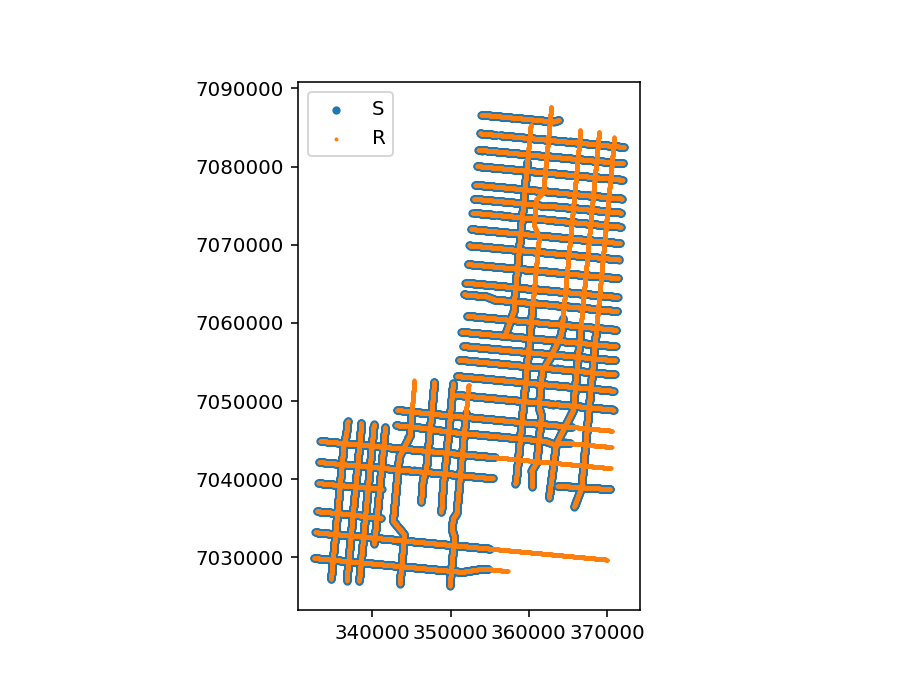

In [2]:
%matplotlib notebook

plt.scatter(dfs['x'], dfs['y'], s=10, label="S")
plt.scatter(dfr['x'], dfr['y'], s=1, label="R")

plt.legend()
plt.axes().set_aspect('equal')
plt.show()

## Инференс

Запуск оптимизации положения бинов вдоль профилей (2D сейсмика)

In [3]:
bin_size = 2000

mp_index = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=bin_size, iters=100)

Визуализация распределения количества трасс внутри бинов вдоль профилей

<IPython.core.display.Javascript object>


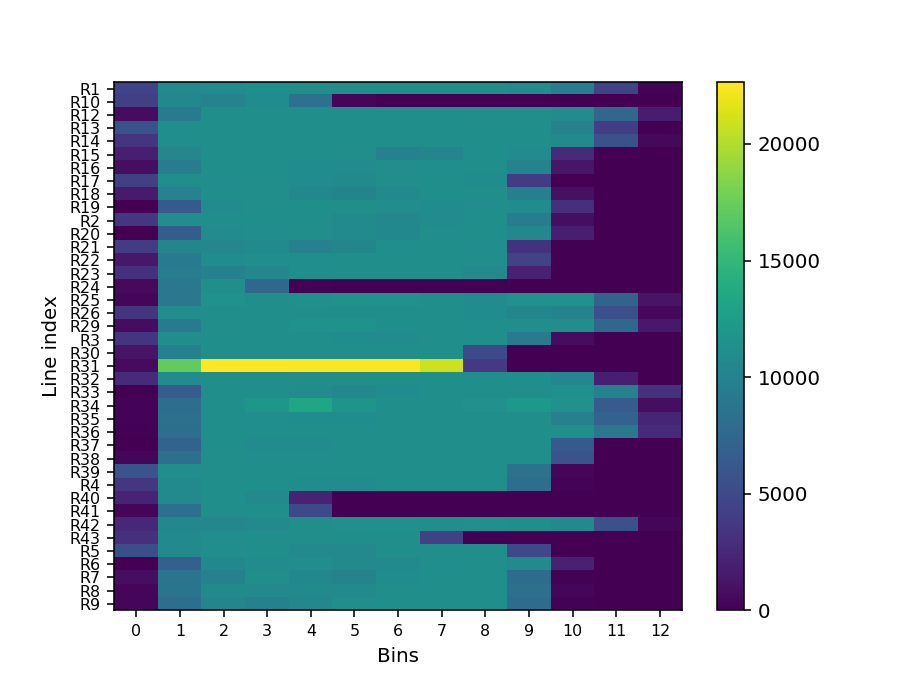

In [4]:
%matplotlib notebook

mp_index.show_heatmap()

Запуск оптимизации положения бинов двумерной сетки (3D сейсмика)

In [5]:
bin_size = 2000

mp_index_2d = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=(bin_size, bin_size), iters=20)

Визуализация распределения количества трасс внутри бинов для двумерной сетки

<IPython.core.display.Javascript object>


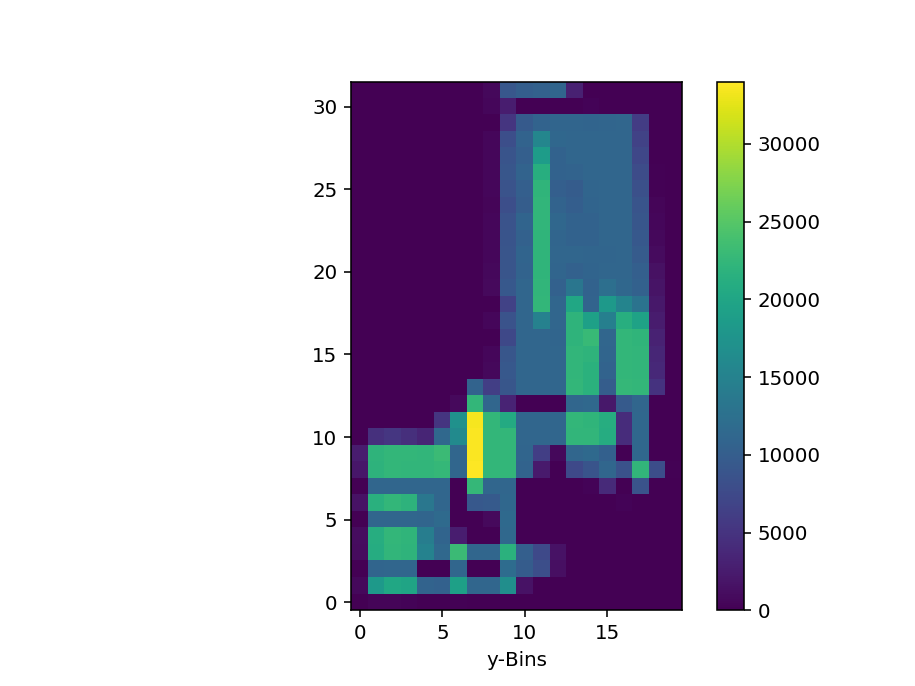

In [6]:
%matplotlib notebook

mp_index_2d.show_heatmap()